El acceso a este Documento de Colab lo realizamos por medio del siguiente link: https://colab.research.google.com/drive/1MXtrRn5ctgezDS7K7Ii_YRT28Zgiohbl?usp=sharing

In [ ]:
!wget --no-check-certificate 'https://raw.githubusercontent.com/inteligenciafrvm/inteligenciafrvm/master/Clases%20pr%C3%A1cticas/funciones_utiles.py'

--2021-07-07 17:24:13--  https://raw.githubusercontent.com/inteligenciafrvm/inteligenciafrvm/master/Clases%20pr%C3%A1cticas/funciones_utiles.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4786 (4.7K) [text/plain]
Saving to: ‘funciones_utiles.py.1’

funciones_utiles.py 100%[===================>]   4.67K  --.-KB/s    in 0s      

2021-07-07 17:24:13 (38.8 MB/s) - ‘funciones_utiles.py.1’ saved [4786/4786]



In [ ]:
# Imporacion
import matplotlib.pyplot as plt
import gym
import numpy as np
from funciones_utiles import plot_reward_per_episode, plot_steps_per_episode, plot_steps_per_episode_smooth, draw_value_matrix

# 1. Resolver uno de ambos ejercicios (Opcional: resolver ambos)

## A. Ejercicios iniciales de aprendizaje por refuerzos

1. ¿Cuál es la política o políticas óptima(s) tomando a  H  como estado inicial?

Las politicas a tomar comenzando en H son:
- Izquierda (pasar a G)
- Arriba (pasar a D)
- Arriba (pasar a A)
- Derecha (pasar a B)
- Derecha (pasar a C)

2. ¿Cuál sería el valor de  v(D)  bajo la Política 1 (asumiendo  γ=1 )?
Política 1: El agente elige la primera acción posible de la siguiente lista: [Derecha, Arriba, Izquierda, Abajo]

- D -> A = -1 (Arriba)
- D -> E = -5 (Derecha)
- D -> G = -1 (Abajo)
- Izuierda no aplica, ya que no es una posibilidad a dar estando en D

3. ¿Cuál es el retorno  Rt  de un agente que, de acuerdo a su política de actuación, realiza el recorrido [D, E, B, C] desde  St=D , asumiendo un descuento  γ=0.1 ?

- D -> E = -5
- E -> B = -1
- B -> C = +50
- 50 - 5 - 1 = 44 * 0.1 = 4.4

Retorno de Rt = 4.4

4. ¿Cuál sería el valor de  q(B,abajo)  bajo la Política 1, asumiendo  γ=1 ?

El valor es: -5

## B. Implementar política de exploración Softmax, donde la probabilidad de una acción $a$ en un estado $s$ está dada

In [ ]:
#def politica_softmax(q):
    #sofmax_q = np.exp(q) / np.sum(np.exp(q))
    #return sofmax_q

In [ ]:
def choose_action_sofmax(state):
  q_values = [q.get((state, a), 0.0) for a in actions]
  sofmax_q = np.exp(np.array(q_values)/tau) / np.sum(np.exp(np.array(q_values)/tau))
  random_s = random_state.uniform()
  for s in range(len(sofmax_q)):
    if random_s < sofmax_q[s]: 
      return actions[s]
  return actions[s]

In [ ]:
def run():
    """
    Corre el agente de RL
    """
    timesteps_of_episode = []  # registro de la cantidad de pasos que le llevó en cada episodio
    reward_of_episode = []  # cantidad de recompensa que recibió el agente en cada episodio

    for i_episode in range(episodes_to_run):
        # se ejecuta una instancia del agente hasta que el mismo llega a la salida
        # o tarda más de 2000 pasos

        # reinicia el ambiente, obteniendo el estado inicial del mismo
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # elige una acción basado en el estado actual
        action = choose_action_sofmax(state)
        
        while not done:

            # el agente ejecuta la acción elegida y obtiene los resultados
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action_sofmax(next_state)
            
            episode_reward += reward
            learn_sarsa(state, action, reward, next_state, next_action)

            if not done and t < 2000:
                state = next_state
                action = next_action
            else:
                # el algoritmo no ha podido llegar a la meta antes de dar 2000 pasos
                done = True  # se establece manualmente la bandera done
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

In [ ]:
def learn_sarsa(state, action, reward, next_state, next_action):
    """
    Dado un (estado, acción, recompensa, estado siguiente), 
    realiza una actualización SARSA de Q(s,a)
    """

    q[(state, action)] = q.get((state, action),0.0) + alpha * ( reward + gamma * q.get((next_state, next_action),0.0)  - q.get((state, action),0.0))

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

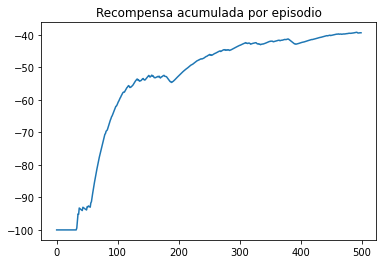

In [ ]:
plot_reward_per_episode(reward_ep)

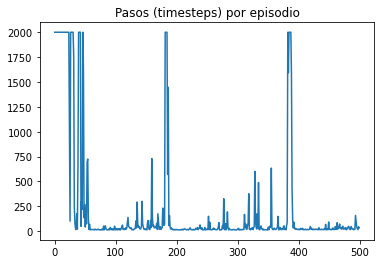

In [ ]:
plot_steps_per_episode(timesteps_ep)

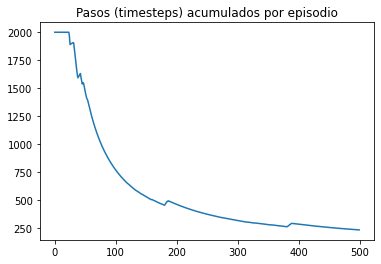

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

**Conclusión: ** Luego de la implementación de sofmax para el cambio de estados sorteando las acciones a tomar bajo la politica. Viendo que de tal forma su convergencia se da de una forma mas prolija con respecto a la cantidad de pasos dados por cada episodios con la posibilidad de que no corte por cantidad de pasos maximos.

# 2. Implementar y ejecutar el algoritmo SARSA en "The Cliff".

In [ ]:
def choose_action(state):
    """
    Elige una acción según el aprendizaje realizado, usando una
    política de exploración épsilon-greedy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]  # ej: para 4 acciones inicializa en [0,0,0,0]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:  # sorteamos un número: es menor a épsilon?
        return random_state.choice(actions)  # sí: se selecciona una acción aleatoria

    count = q_values.count(max_q)

    # hay más de un máximo valor de estado-acción?
    if count > 1:
        # sí: seleccionamos uno de ellos aleatoriamente
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        # no: seleccionamos el máximo valor de estado-acción
        i = q_values.index(max_q)

    return actions[i]

In [ ]:
def run():
    """
    Corre el agente de RL
    """
    timesteps_of_episode = []  # registro de la cantidad de pasos que le llevó en cada episodio
    reward_of_episode = []  # cantidad de recompensa que recibió el agente en cada episodio

    for i_episode in range(episodes_to_run):
        # se ejecuta una instancia del agente hasta que el mismo llega a la salida
        # o tarda más de 2000 pasos

        # reinicia el ambiente, obteniendo el estado inicial del mismo
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # elige una acción basado en el estado actual
        action = choose_action(state)
        
        while not done:

            # el agente ejecuta la acción elegida y obtiene los resultados
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            
            episode_reward += reward
            learn_sarsa(state, action, reward, next_state, next_action)

            if not done and t < 2000:
                state = next_state
                action = next_action
            else:
                # el algoritmo no ha podido llegar a la meta antes de dar 2000 pasos
                done = True  # se establece manualmente la bandera done
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

In [ ]:
def learn_sarsa(state, action, reward, next_state, next_action):
    """
    Dado un (estado, acción, recompensa, estado siguiente), 
    realiza una actualización SARSA de Q(s,a)
    """

    q[(state, action)] = q.get((state, action),0.0) + alpha * ( reward + gamma * q.get((next_state, next_action),0.0)  - q.get((state, action),0.0))

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

### Analisis del Agente

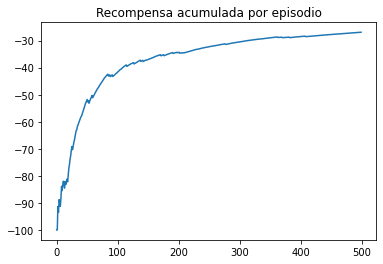

In [ ]:
plot_reward_per_episode(reward_ep)

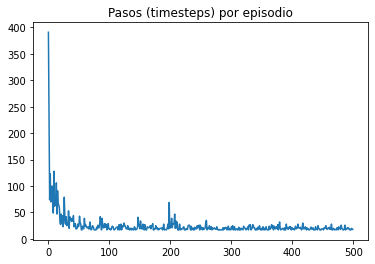

In [ ]:
plot_steps_per_episode(timesteps_ep)

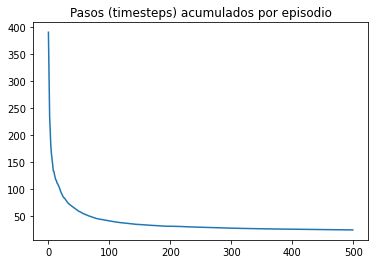

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

## 3. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

In [ ]:
def run():
    """
    Corre el agente de RL
    """
    timesteps_of_episode = []  # registro de la cantidad de pasos que le llevó en cada episodio
    reward_of_episode = []  # cantidad de recompensa que recibió el agente en cada episodio

    for i_episode in range(episodes_to_run):
        # se ejecuta una instancia del agente hasta que el mismo llega a la salida
        # o tarda más de 2000 pasos

        # reinicia el ambiente, obteniendo el estado inicial del mismo
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # elige una acción basado en el estado actual
        action = choose_action(state)
        
        while not done:

            # el agente ejecuta la acción elegida y obtiene los resultados
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            
            episode_reward += reward
            learn_qlearning(state, action, reward, next_state, next_action)

            if not done and t < 2000:
                state = next_state
                action = next_action
            else:
                # el algoritmo no ha podido llegar a la meta antes de dar 2000 pasos
                done = True  # se establece manualmente la bandera done
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

In [ ]:
def learn_qlearning(state, action, reward, next_state, next_action):
    """
    Dado un (estado, acción, recompensa, estado siguiente), 
    realiza una actualización Q-Learning de Q(s,a)
    """
    q[(state, action)] = q.get((state, action),0.0) + alpha * ( reward + gamma * np.argmax(q.get((next_state),0.0))  - q.get((state, action),0.0))

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

### Analisis del Agente

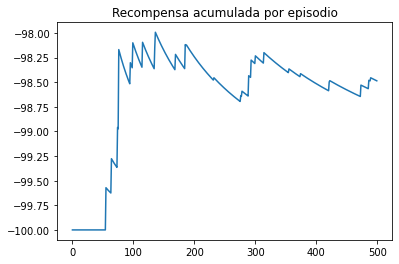

In [ ]:
plot_reward_per_episode(reward_ep)

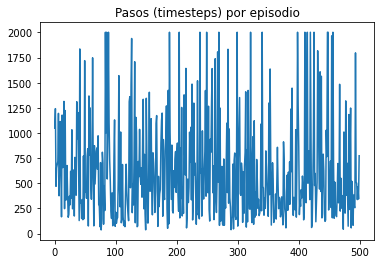

In [ ]:
plot_steps_per_episode(timesteps_ep)

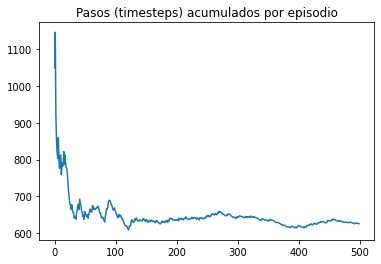

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

**Conclusión:** Se obtiene en este caso un mejor rendimiento al aplicar Q-Learning como vemos en las gráficas porque es un método que logro converger en un valor de forma mas suave que SARSA. Porque SARSA no logra conseguir un gráfico de convergencia sino que sigue haciendo picos sin estabilidad en un valor.
Esta diferencia de convergencia se da ya que en Q-Learning utilizamos el argumento maximo con respecto a los estados, siendo de caso contrario en SARSA  que utilizamos el valor que dictamina el conjunto de q con respecto a "next_state" y "next_action".

Documentacion que utilice para el **np.argmax**
- https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

## 4. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$. Si se implementó Softmax, mostrar también cómo se desempeña el agente con distintos valores de $\tau$, por ejemplo 0.1, 1, 50, 200.

### Variación de $\alpha$

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.2
gamma = 0.8
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

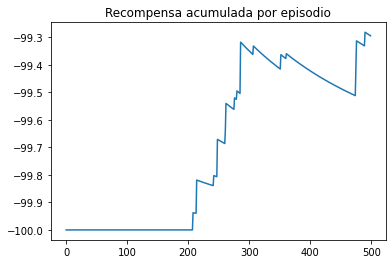

In [ ]:
plot_reward_per_episode(reward_ep)

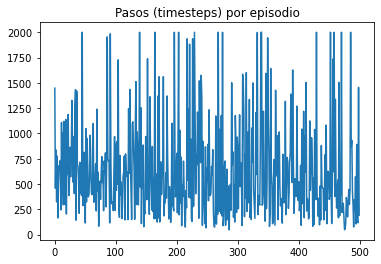

In [ ]:
plot_steps_per_episode(timesteps_ep)

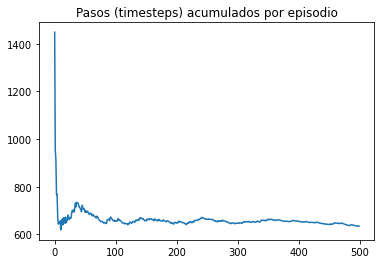

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 0.8
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

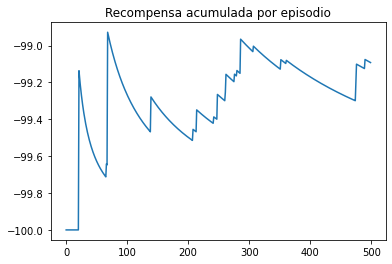

In [ ]:
plot_reward_per_episode(reward_ep)

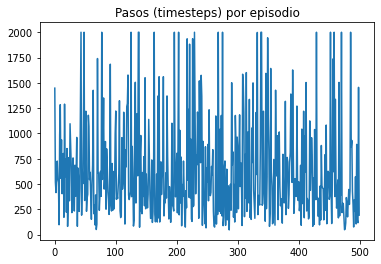

In [ ]:
plot_steps_per_episode(timesteps_ep)

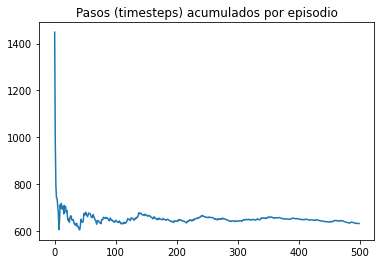

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.9
gamma = 0.8
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

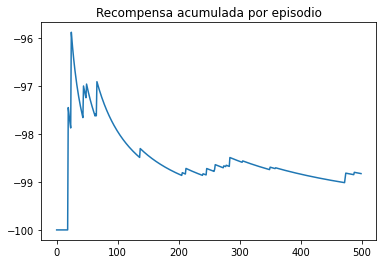

In [ ]:
plot_reward_per_episode(reward_ep)

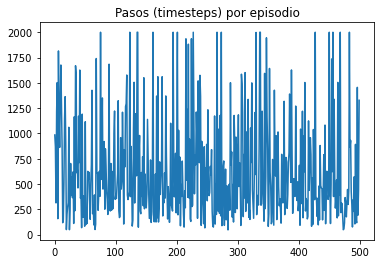

In [ ]:
plot_steps_per_episode(timesteps_ep)

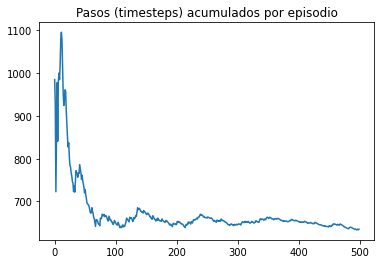

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

**Conclusion:** Cuanto mas chico es el alpha, puedo observar que las recompensas se van hacia la izquierda sin comenzar desde un principio haciendo mas cortes antes de llegar a los pasos limites y logrando la convergecia de forma mas rapido que ante mayor alpha.
Aun que por lo observado por el valor de 0.5 ahi se converge mas rapido como un valor chico y de forma mas tenue y prolija, por mas que comience con un pico mas alto parece ser eso. En cambio en el caso de mayor alpha contamos con un menor pico de comienzo encontrado asi la estabilidad sin una oscilacion tan grande.

### Variacion de $\gamma$

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.3
gamma = 0.2
epsilon = 0.5
tau = 25

episodes_to_run = 700

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

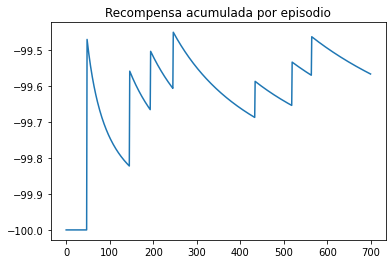

In [ ]:
plot_reward_per_episode(reward_ep)

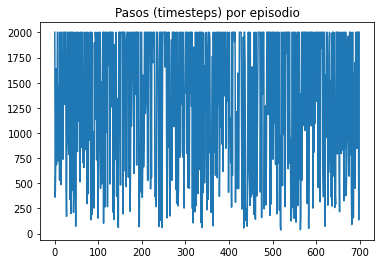

In [ ]:
plot_steps_per_episode(timesteps_ep)

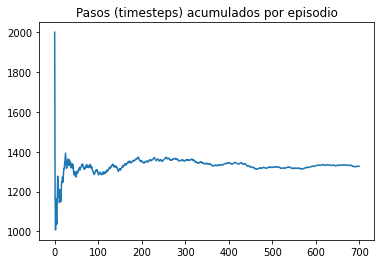

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.3
gamma = 0.5
epsilon = 0.5
tau = 25

episodes_to_run = 700

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

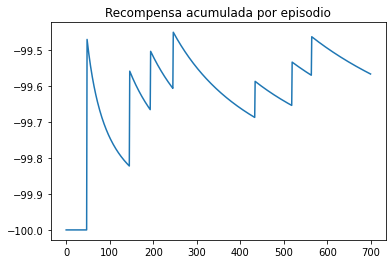

In [ ]:
plot_reward_per_episode(reward_ep)

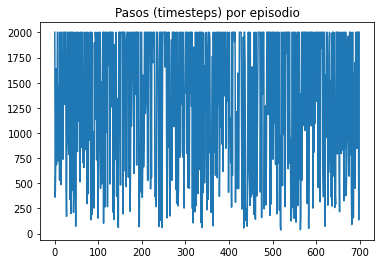

In [ ]:
plot_steps_per_episode(timesteps_ep)

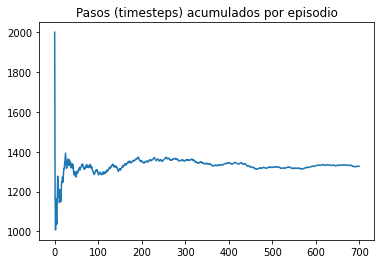

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.3
gamma = 0.99
epsilon = 0.5
tau = 25

episodes_to_run = 700

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

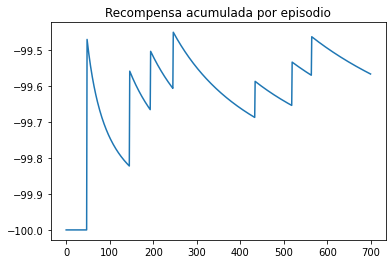

In [ ]:
plot_reward_per_episode(reward_ep)

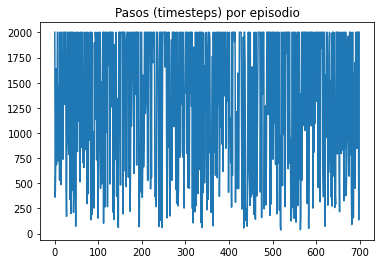

In [ ]:
plot_steps_per_episode(timesteps_ep)

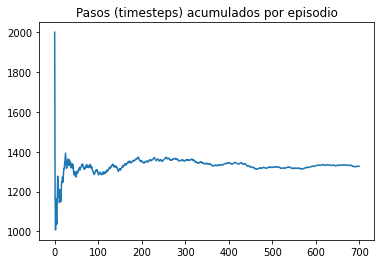

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

**Conclusion:** Dada esta variacion que realizamos con gamma no se llega a notar el cambio pero seria que estamos modificando el descuento otorgado por episodio. Lo que esto nos afecta es en el largoplacismo conseguido para la convergencia. Cuando mas cercano a 1 es, mas largoplacismo manteniendo la grafica.

### Variación de $\epsilon$

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 0.8
epsilon = 0.2
tau = 25

episodes_to_run = 700

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

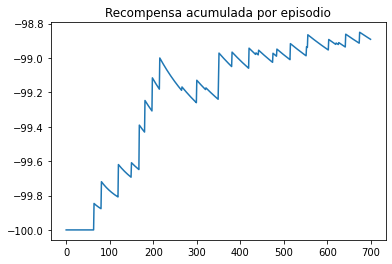

In [ ]:
plot_reward_per_episode(reward_ep)

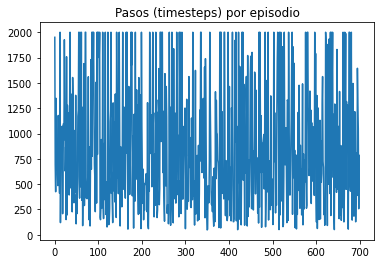

In [ ]:
plot_steps_per_episode(timesteps_ep)

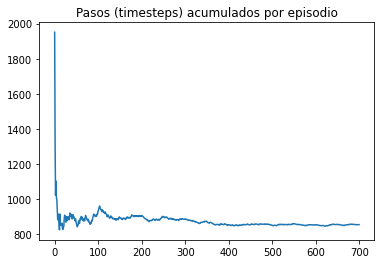

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 0.8
epsilon = 0.5
tau = 25

episodes_to_run = 700

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

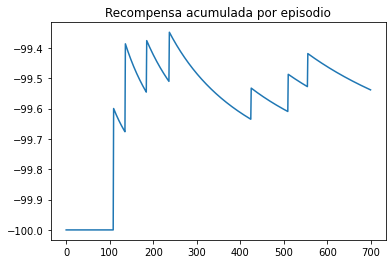

In [ ]:
plot_reward_per_episode(reward_ep)

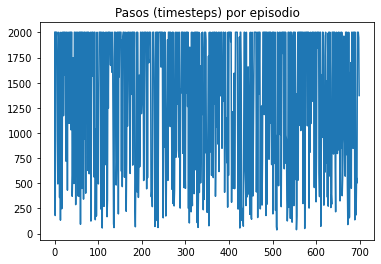

In [ ]:
plot_steps_per_episode(timesteps_ep)

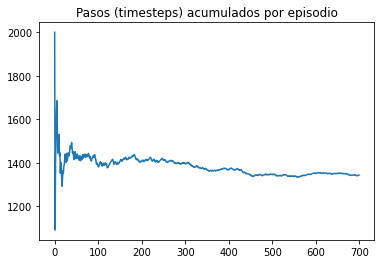

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 0.8
epsilon = 0.8
tau = 25

episodes_to_run = 700

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

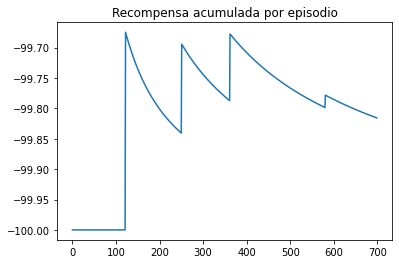

In [ ]:
plot_reward_per_episode(reward_ep)

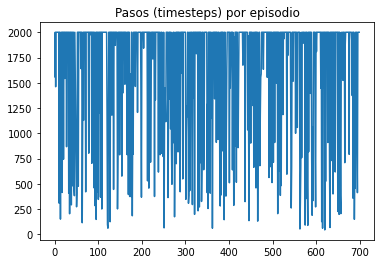

In [ ]:
plot_steps_per_episode(timesteps_ep)

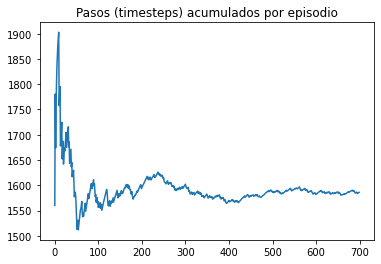

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

**Conclusión:** Cuando el epsilon es mas grande tenemos una grafica de recompesas menos fuctuante y con una menor fluctuacion en pasos como vemos en el grafico superior a este, podemos converger con menos fluctuacion.
Esto se da debido que a mayor epsilon, tenemos mayor exploracion por lo tanto mejor resultado en la explotacion que realicemos.

### Variación de $\tau$

In [ ]:
def choose_action_sofmax(state):
  q_values = [q.get((state, a), 0.0) for a in actions]
  sofmax_q = np.exp(np.array(q_values)/tau) / np.sum(np.exp(np.array(q_values)/tau))
  random_s = random_state.uniform()
  for s in range(len(sofmax_q)):
    if random_s < sofmax_q[s]: 
      return actions[s]
  return actions[s]

In [ ]:
def run_():
    """
    Corre el agente de RL
    """
    timesteps_of_episode = []  # registro de la cantidad de pasos que le llevó en cada episodio
    reward_of_episode = []  # cantidad de recompensa que recibió el agente en cada episodio

    for i_episode in range(episodes_to_run):
        # se ejecuta una instancia del agente hasta que el mismo llega a la salida
        # o tarda más de 2000 pasos

        # reinicia el ambiente, obteniendo el estado inicial del mismo
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # elige una acción basado en el estado actual
        action = choose_action_sofmax(state)
        
        while not done:

            # el agente ejecuta la acción elegida y obtiene los resultados
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action_sofmax(next_state)
            
            episode_reward += reward
            learn_sarsa(state, action, reward, next_state, next_action)

            if not done and t < 2000:
                state = next_state
                action = next_action
            else:
                # el algoritmo no ha podido llegar a la meta antes de dar 2000 pasos
                done = True  # se establece manualmente la bandera done
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

In [ ]:
def learn_sarsa(state, action, reward, next_state, next_action):
    """
    Dado un (estado, acción, recompensa, estado siguiente), 
    realiza una actualización SARSA de Q(s,a)
    """

    q[(state, action)] = q.get((state, action),0.0) + alpha * ( reward + gamma * q.get((next_state, next_action),0.0)  - q.get((state, action),0.0))

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run_()

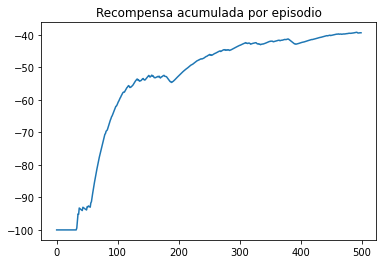

In [ ]:
plot_reward_per_episode(reward_ep)

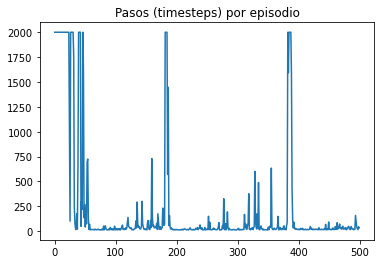

In [ ]:
plot_steps_per_episode(timesteps_ep)

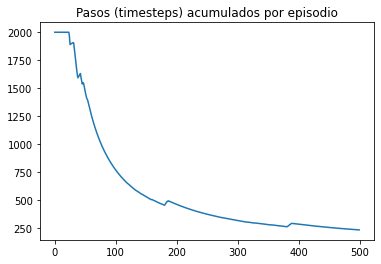

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 100

episodes_to_run = 700

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run_()

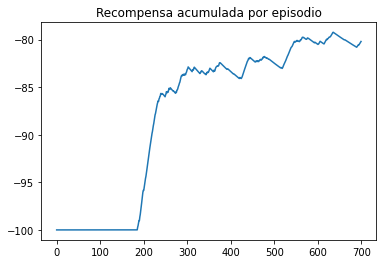

In [ ]:
plot_reward_per_episode(reward_ep)

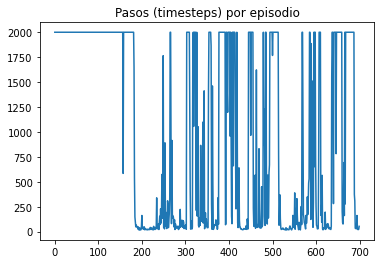

In [ ]:
plot_steps_per_episode(timesteps_ep)

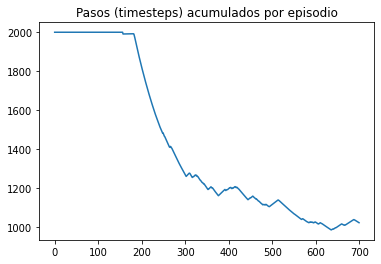

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 250

episodes_to_run = 700

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(100)

In [ ]:
avg_reward_per_episode, timesteps_ep, reward_ep = run_()

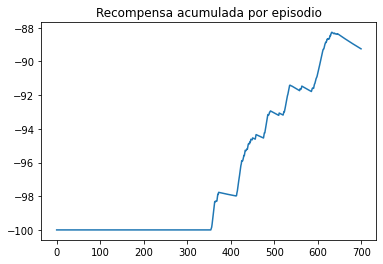

In [ ]:
plot_reward_per_episode(reward_ep)

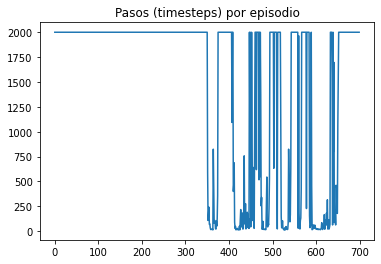

In [ ]:
plot_steps_per_episode(timesteps_ep)

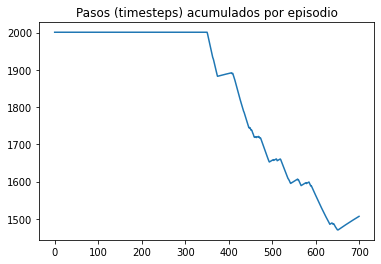

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

**Conclusion:** Cuando mayor es tau provoca que comience con valores planos en todos los sentidos tanto en recompensa, como en pasos y de esta forma cuando decae para buscar la convergencia lo que haces es bajar de forma mas brusca para conseguirlo con un largoplacismo mas corto

# Opcionales

## 1. Crear tu propio entorno y entrenar agentes RL en el mismo. Analizar la convergencia con distintos algoritmos* (ej: PPO, DQN), resultados con distintas funciones de recompensa e híper-parámetros.

In [ ]:
#@title Instalación (no modificar)
!pip install stable-baselines3[extra,tests,docs]>=0.11.0a4
!pip install git+https://github.com/DLR-RM/stable-baselines3

ERROR: sphinxcontrib-spelling 7.2.1 has requirement Sphinx>=3.0.0, but you'll have sphinx 1.8.5 which is incompatible.
  Cloning https://github.com/DLR-RM/stable-baselines3 to /tmp/pip-req-build-z73sbrp8
  Running command git clone -q https://github.com/DLR-RM/stable-baselines3 /tmp/pip-req-build-z73sbrp8
  Created wheel for stable-baselines3: filename=stable_baselines3-1.2.0a0-cp37-none-any.whl size=160875 sha256=e043eae33838869f132892cfaabf813a53453363ad2bd781d2b1278a7c03a409
  Stored in directory: /tmp/pip-ephem-wheel-cache-13i901zw/wheels/cf/89/6b/cd4b89427eb5ff0858bcba73911088d606c59eb3a97290b1bb
Successfully built stable-baselines3


In [ ]:
#@title Instalación de RLBaselinesZoo (no modificar)

IN_COLAB = False

if IN_COLAB:
    !git clone --recursive https://github.com/DLR-RM/rl-baselines3-zoo
    !cd rl-baselines3-zoo/
    !apt-get install swig cmake ffmpeg
    !pip install -r /content/rl-baselines3-zoo/requirements.txt

In [ ]:
import os
from subprocess import Popen, PIPE

import numpy as np
import matplotlib.pyplot as plt

import gym
from gym import spaces
#from gym.envs.registration import register

from stable_baselines3 import DQN, PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.env_util import make_vec_env

os.makedirs('logs', exist_ok=True)

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

cwd = os.getcwd()

%matplotlib inline
%load_ext tensorboard

In [ ]:
class GoLeftEnv(gym.Env):
  """
  Ambiente personalizado que sigue la interfaz de gym.
  Es un entorno simple en el cuál el agente debe aprender a ir siempre 
  hacia la izquierda.
  """
  # Dado que estamos en colab, no podemos implementar la salida por interfaz 
  # gráfica ('human' render mode) 
  metadata = {'render.modes': ['console']}
  # Definimos las constantes
  LEFT = 0
  RIGHT = 1

  def __init__(self, grid_size=10):
    super(GoLeftEnv, self).__init__()

    # Tamaño de la grilla de 1D
    self.grid_size = grid_size
    # Inicializamos en agente a la derecha de la grilla
    self.agent_pos = grid_size - 1

    # Definimos el espacio de acción y observaciones
    # Los mismos deben ser objetos gym.spaces
    # En este ejemplo usamos dos acciones discretas: izquierda y derecha
    n_actions = 2
    self.action_space = spaces.Discrete(n_actions)
    # La observación será la coordenada donde se encuentra el agente
    # puede ser descrita tanto por los espacios Discrete como Box
    self.observation_space = spaces.Box(low=0, high=self.grid_size,
                                        shape=(1,), dtype=np.float32)

  def reset(self):
    """
    Importante: la observación devuelta debe ser un array de numpy
    :return: (np.array) 
    """
    # Se inicializa el agente a la derecha de la grilla
    self.agent_pos = self.grid_size - 1
    # convertimos con astype a float32 (numpy) para hacer más general el agente
    # (en caso de que querramos usar acciones continuas)
    return np.array([self.agent_pos]).astype(np.float32)

  def step(self, action):
    if action == self.LEFT:
      self.agent_pos -= 1
    elif action == self.RIGHT:
      self.agent_pos += 1
    else:
      raise ValueError("Received invalid action={} which is not part of the action space".format(action))

    # Evitamos que el agente se salga de los límites de la grilla
    self.agent_pos = np.clip(self.agent_pos, 0, self.grid_size)

    # Llegó el agente a su estado objetivo (izquierda) de la grilla?
    done = bool(self.agent_pos == 0)

    # Asignamos recompensa sólo cuando el agente llega a su objetivo
    # (recompensa = 0 en todos los demás estados)
    reward = 1 if self.agent_pos == 0 else 0
    reward = 100 if self.agent_pos == 6 else 0

    # gym también nos permite devolver información adicional, ej. en atari: 
    # las vidas restantes del agente (no usaremos esto por ahora)
    info = {}

    return np.array([self.agent_pos]).astype(np.float32), reward, done, info

  def render(self, mode='console'):
    if mode != 'console':
      raise NotImplementedError()
    # en nuestra interfaz de consola, representamos el agente como una cruz, y 
    # el resto como un punto
    print("." * self.agent_pos, end="")
    print("x", end="")
    print("." * (self.grid_size - self.agent_pos))
  
  def close(self):
    pass

In [ ]:
env = GoLeftEnv(grid_size=10)
env = make_vec_env(lambda: env, n_envs=1)

model = PPO('MlpPolicy', env, verbose=1).learn(20000)

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 147      |
|    ep_rew_mean     | 1.51e+03 |
| time/              |          |
|    fps             | 1554     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 79.5        |
|    ep_rew_mean          | 845         |
| time/                   |             |
|    fps                  | 1133        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015217727 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.68       |
|    explained_variance   | -9.89e-06   |
|    learning

In [ ]:
obs = env.reset()
for i in range(10):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render(mode='console')
    if dones[0]:
        obs = env.reset()

........x..
.......x...
......x....
.....x.....
......x....
.......x...
......x....
.......x...
........x..
.......x...


Lo que realizamos en este punto fue encontrar una penalizacion dada en el reward en tal posicion para que si llega a la misma lo rechace y si quiera avanzar.
Antes de esto lo que busque de realizar fue un panel de campo aleatorio dependiendo la corrida tuviese diversos obstaculos simpre diferente pero no aplica en este caso por lo cual no me lograba nunca hacerlo por lo que finalmente llegue a esta resolucion.

## 2. Entrena agentes en entornos más complejos con stable-baselines/rl-baselines-zoo.

Este ejercicio lo lleve a cabo en mi pc con mis recursos por lo cual le dejo captura a continuacion del codigo con le resultado obtenido de haber elegido SpaceInvaders-v0

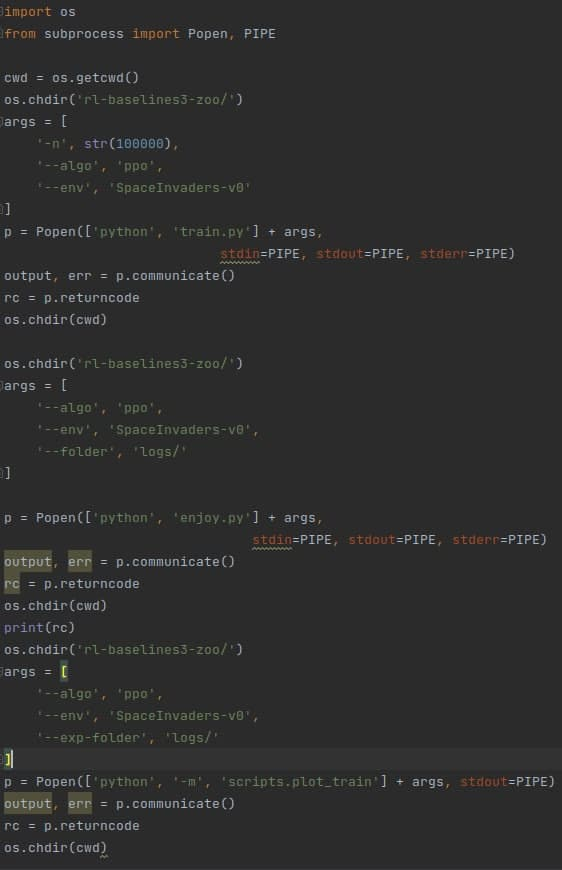

**Grafico**

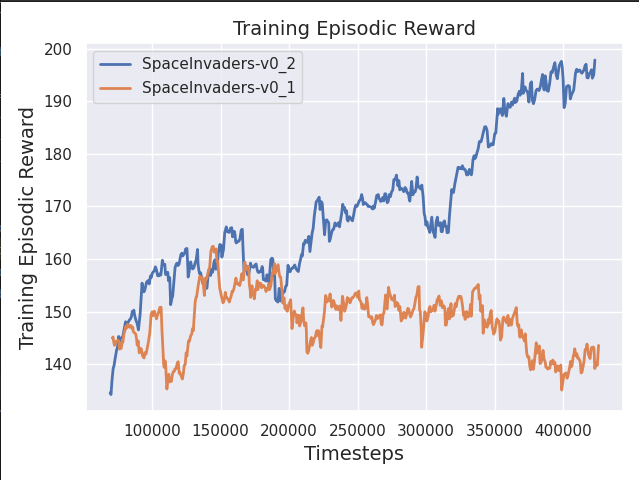

**Conclusion final:** Luego de esta implementacion que no fue familiar pero se logro hacer y de haber obtenido los resultados demostrados en el grafico anterior, fue muy agradable trabajar con esto implementado el entorno con PPO y viendo como redituo el entrenamiento luego de un tiempo.